In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

from sklearn.decomposition import TruncatedSVD

import gensim
from gensim.models import CoherenceModel
import string
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"..\css-файлы\dataset.csv")
df1

,NameCompany,Description,Raiting,DataPublish,Activity,TextArticle
0,red_mad_robot,NaN,117.94,6 часов назад,№1 в разработке цифровых решений для бизнеса,"Средний18 мин redmadrobot Cocoapods, Carthage,..."
1,Сбер,NaN,406.42,5 часов назад,"Технологии, меняющие мир","ETL-потоки «VACUUM FULL», или Как учесть особе..."
2,Cloud4Y,NaN,71.07,5 часов назад,#1 Корпоративный облачный провайдер,Простой3 мин OSINT & Hacking — как работает фи...
3,Инферит,NaN,55.19,5 часов назад,Подписаться,"«Подписка на пончики», или Как получить облачн..."
4,Southbridge,NaN,280.79,2 часа назад,Обеспечиваем стабильную работу highload-проектов,5 мин zubarek Быстрое начало работы с Gitlab C...
5,Альфа-Банк,NaN,404.32,2 часа назад,Лучший мобильный банк по версии Markswebb,участия человека 1 мин 717 Войти Моя лента Все...
6,RUVDS.com,NaN,2376.9,4 часа назад,VDS/VPS-хостинг. Скидка 15% по коду HABR15,"Простой9 мин ru_vds Инструменты наблюдаемости,..."
7,Хабр,NaN,353.18,10 часов назад,"Экосистема для развития людей, вовлеченных в IT",История российской науки: напишем вместе? Прос...
8,RUVDS.com,NaN,2394.92,NaN,VDS/VPS-хостинг. Скидка 15% по коду HABR15,NaN
9,RUVDS.com,NaN,2593.78,5 часов назад,VDS/VPS-хостинг. Скидка 15% по коду HABR15,Как я создавал Telegram-бота с помощью ChatGPT...


In [3]:
df2 = pd.read_csv(r"..\css-файлы\jsonset.csv")
df2

,Название статьи,Содержание,Дата публикации,Рейтинг,Просмотры,Ставка,Подписчики,Индустрия,О нас
0,Cybersport,7 декабря состоялась церемония награждения лау...,8 декабря 09:30,6,2300,NaN,NaN,NaN,NaN
1,ESforce Holding,7 декабря состоялась церемония награждения лау...,8 декабря 09:30,6,2300,NaN,NaN,NaN,NaN
2,ESforce Holding,Из совместного исследования издателя компьютер...,29 июля 13:50,12,2800,NaN,NaN,NaN,NaN
3,ESforce Holding,По статистике The Esports Observer за I полови...,9 июля 09:33,18,6200,NaN,NaN,NaN,NaN
4,ESforce Holding,Компании SuperData Research и PayPal провели с...,11 апреля 12:43,11,10000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,Федерация креативных индустрий,"Привет, Хабр! Представляю вашему вниманию пере...",30 января 10:43,32,9300,NaN,NaN,NaN,NaN
1112,Федерация креативных индустрий,Источник\n«Умный человек не делает все ошибки ...,24 апреля 12:37,3,7700,NaN,NaN,NaN,NaN
1113,Федерация креативных индустрий,"Привет, Хабр! Сегодня мы решили поделиться с с...",12 октября 14:09,19,9300,NaN,NaN,NaN,NaN
1114,Федерация креативных индустрий,"Привет! Меня зовут Никита Бокарев, я креативны...",4 сентября 16:44,52,52000,NaN,NaN,NaN,NaN


In [4]:
df3 = pd.read_csv(r"films.csv")
df3

,Unnamed: 0,title,duration,year,country,language,rating,age limit,description
0,0,В поисках счастья,117 мин,2006,США,Английский,8.0,12+,"История о том, как один человек преодолевает т..."
1,1,Начало,148 мин,2010,США,Английский,8.8,16+,Группа воров использует сны для кражи информации.
2,2,Матрица,136 мин,1999,США,Английский,8.7,16+,"Человек, который открывает правду о реальности."
3,3,Зеленая миля,189 мин,1994,США,Английский,8.6,16+,Судьба заключенного и его дружбы с другим закл...
4,4,Интерстеллар,169 мин,2014,США,Английский,8.6,12+,Путешествие через червоточину в поисках нового...
5,5,Титаник,195 мин,1997,США,Английский,7.8,12+,История любви на фоне катастрофы.
6,6,Аватар,162 мин,2009,США,Английский,7.8,12+,Научно-фантастическая история о колонизации др...


In [5]:
df1 = df1.rename(columns={
    'TextArticle': 'text',
    'Raiting': 'rate',
    'DataPublish': 'date'
})

df2 = df2.rename(columns={
    'Содержание': 'text',
    'Рейтинг': 'rate', 
    'Дата публикации': 'date'
})

df3 = df3.rename(columns={
    'description': 'text',
    'rating': 'rate',
    'year':'date'
})

In [6]:
df1 = df1[['text', 'rate', 'date']]
df2 = df2[['text', 'rate', 'date']]
df3 = df3[['text', 'rate', 'date']]

In [7]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df

,text,rate,date
0,"Средний18 мин redmadrobot Cocoapods, Carthage,...",117.94,6 часов назад
1,"ETL-потоки «VACUUM FULL», или Как учесть особе...",406.42,5 часов назад
2,Простой3 мин OSINT & Hacking — как работает фи...,71.07,5 часов назад
3,"«Подписка на пончики», или Как получить облачн...",55.19,5 часов назад
4,5 мин zubarek Быстрое начало работы с Gitlab C...,280.79,2 часа назад
...,...,...,...
1131,"Человек, который открывает правду о реальности.",8.7,1999
1132,Судьба заключенного и его дружбы с другим закл...,8.6,1994
1133,Путешествие через червоточину в поисках нового...,8.6,2014
1134,История любви на фоне катастрофы.,7.8,1997


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1133 non-null   object
 1   rate    1136 non-null   object
 2   date    1133 non-null   object
dtypes: object(3)
memory usage: 26.8+ KB


In [9]:
df.describe()

,text,rate,date
count,1133,1136,1133
unique,1105,173,1101
top,7 декабря состоялась церемония награждения лау...,6,8 декабря 09:30
freq,13,70,13


In [10]:
df.shape

(1136, 3)

In [11]:
df.duplicated().sum()

29

In [12]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [13]:
russian_stopwords = stopwords.words("russian") 

In [14]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','свой','своём','всем','всё','её','оба','ещё']) 

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
st = '\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [17]:
def remove_punctuation(text):
    if not isinstance(text, str):
        return text
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [18]:
df.isnull().sum().sum()

4

In [19]:
df['text'] = df['text'].fillna('')
df['prep_text'] = [remove_othersymbol(text.lower()) for text in df['text']]

In [20]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [21]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [22]:
%%time
lemm_texts_list = []
for text in df['prep_text']:
    try:
        tokens = word_tokenize(text)
        res = []
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form) 
        text = " ".join(res) 
        lemm_texts_list.append(text)
    except Exception as e:
        print(f"Ошибка при обработке текста: {e}")
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 3min 10s
Wall time: 3min 10s


In [23]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [24]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]
df.head()

,text,rate,date,prep_text,text_lemm,tokenize_text
0,"Средний18 мин redmadrobot Cocoapods, Carthage,...",117.94,6 часов назад,средний18 мин redmadrobot cocoapods carthage s...,средний18 мина redmadrobot cocoapods carthage ...,средний18 мина redmadrobot cocoapods carthage ...
1,"ETL-потоки «VACUUM FULL», или Как учесть особе...",406.42,5 часов назад,etlпотоки «vacuum full» или как учесть особенн...,etlпоток « vacuum full » или как учесть особен...,etlпоток « vacuum full » учесть особенность жи...
2,Простой3 мин OSINT & Hacking — как работает фи...,71.07,5 часов назад,простой3 мин osint hacking — как работает фиши...,простой3 мина osint hacking — как работать фиш...,простой3 мина osint hacking — работать фишинга...
3,"«Подписка на пончики», или Как получить облачн...",55.19,5 часов назад,«подписка на пончики» или как получить облачны...,« подписка на пончик » или как получить облачн...,« подписка пончик » получить облачный ресурс с...
4,5 мин zubarek Быстрое начало работы с Gitlab C...,280.79,2 часа назад,5 мин zubarek быстрое начало работы с gitlab c...,5 мина zubarek быстрый начало работа с gitlab ...,5 мина zubarek быстрый начало работа gitlab ci...


In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

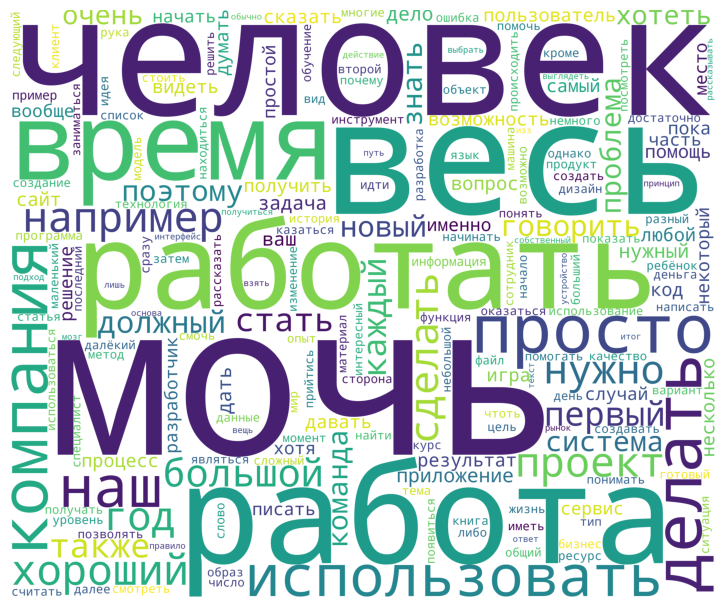

In [27]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [28]:
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

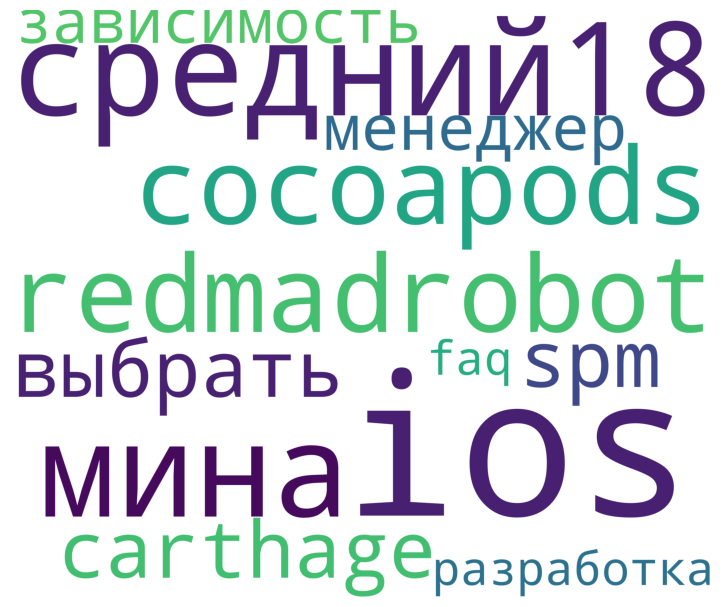

In [29]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

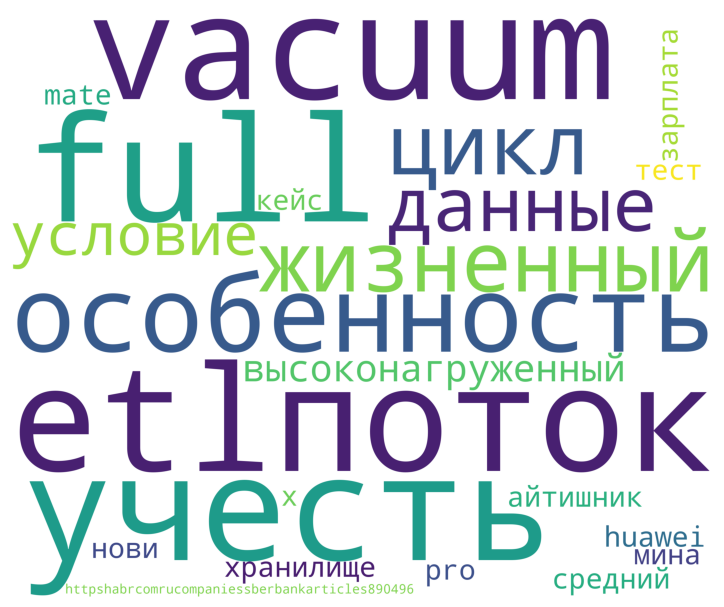

In [30]:
corpus = df['tokenize_text'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

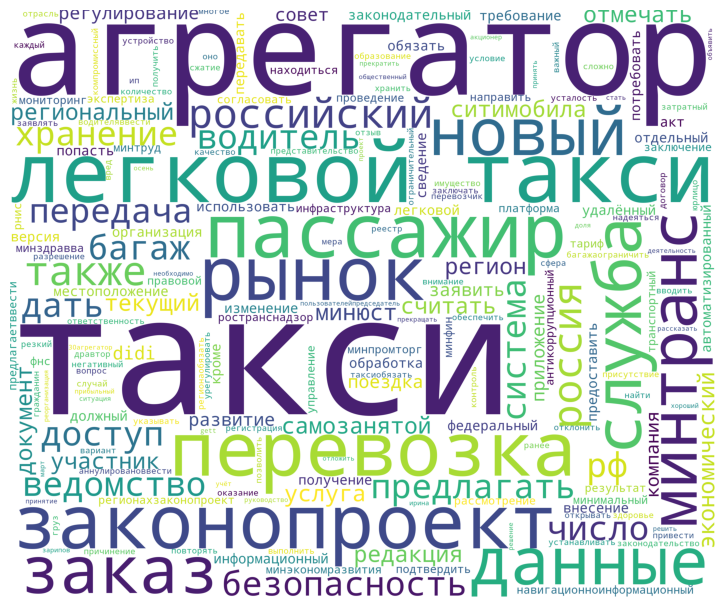

In [31]:
corpus = df['tokenize_text'][16]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=2000,       
    min_df=5,               
    max_df=0.4,              
    stop_words=russian_stopwords,
    ngram_range=(1, 2),      
    use_idf=True,            
    smooth_idf=True,         
    sublinear_tf=True,      
    norm='l2'                
)

In [33]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

In [34]:
tfidf_matrix.shape
print(tfidf_matrix)

  (0, 324)	0.28124247282897064
  (0, 817)	0.3766062010161228
  (0, 497)	0.32909929991362274
  (0, 81)	0.8190018874395912
  (1, 1072)	0.32606779760421595
  (1, 487)	0.47182369769968924
  (1, 1932)	0.3860128200321382
  (1, 1859)	0.27771590379412503
  (1, 1922)	0.2892397119084422
  (1, 1691)	0.2158363572746849
  (1, 6)	0.2132885212574686
  (1, 672)	0.23770115097487898
  (1, 542)	0.23599313923514215
  (1, 35)	0.25655551852752145
  (1, 102)	0.22598518694402125
  (1, 1774)	0.20027130122063405
  (2, 621)	0.3658963769266987
  (2, 180)	0.3543220219482325
  (2, 1666)	0.35711785447525823
  (2, 1576)	0.2969546749838192
  (2, 970)	0.4119957208598436
  (2, 1140)	0.37614859834880726
  (2, 1667)	0.4622037030228983
  (3, 542)	0.23716888195157418
  (3, 35)	0.2578337051868743
  :	:
  (1099, 342)	0.03440888694227205
  (1099, 489)	0.04459382017868934
  (1099, 960)	0.019791782527292
  (1099, 1031)	0.018571382640430144
  (1099, 723)	0.019720102060376127
  (1099, 1877)	0.019791782527292
  (1099, 1270)	0.01818

In [35]:
tfidf_vectorizer.get_feature_names_out()[500:600]

array(['загрузка', 'задавать', 'задание', 'задать', 'задний', 'зайти',
       'заказ', 'заказать', 'заказчик', 'заключаться', 'закон',
       'закончить', 'закончиться', 'закрывать', 'закрытый', 'закрыть',
       'зал', 'замена', 'заменить', 'заметить', 'заметка',
       'замечательный', 'замечать', 'замок', 'занимать', 'заниматься',
       'занятие', 'занять', 'заняться', 'запас', 'записать', 'записывать',
       'запись', 'запрос', 'запуск', 'запускать', 'запустить',
       'зарабатывать', 'заработать', 'заразить', 'заранее',
       'зарегистрировать', 'зарплата', 'зарядка', 'заставить',
       'заставлять', 'затем', 'зато', 'затрата', 'заходить', 'захотеть',
       'зачастую', 'защита', 'заявить', 'заявка', 'звать', 'звонок',
       'звук', 'звучать', 'здание', 'здорово', 'здоровый', 'здоровье',
       'зелёный', 'земля', 'знак', 'знакомый', 'знание', 'значение',
       'значит', 'значительно', 'значительный', 'зона', 'зрение', 'зуб',
       'иван', 'игра', 'играть', 'игровой', 'игр

In [36]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [37]:
df['tokenize_text2'] = [tokenize2(text) for text in df['tokenize_text']]

In [38]:
df.head()

,text,rate,date,prep_text,text_lemm,tokenize_text,tokenize_text2
0,"Средний18 мин redmadrobot Cocoapods, Carthage,...",117.94,6 часов назад,средний18 мин redmadrobot cocoapods carthage s...,средний18 мина redmadrobot cocoapods carthage ...,средний18 мина redmadrobot cocoapods carthage ...,"[средний18, мина, redmadrobot, cocoapods, cart..."
1,"ETL-потоки «VACUUM FULL», или Как учесть особе...",406.42,5 часов назад,etlпотоки «vacuum full» или как учесть особенн...,etlпоток « vacuum full » или как учесть особен...,etlпоток « vacuum full » учесть особенность жи...,"[etlпоток, «, vacuum, full, », учесть, особенн..."
2,Простой3 мин OSINT & Hacking — как работает фи...,71.07,5 часов назад,простой3 мин osint hacking — как работает фиши...,простой3 мина osint hacking — как работать фиш...,простой3 мина osint hacking — работать фишинга...,"[простой3, мина, osint, hacking, —, работать, ..."
3,"«Подписка на пончики», или Как получить облачн...",55.19,5 часов назад,«подписка на пончики» или как получить облачны...,« подписка на пончик » или как получить облачн...,« подписка пончик » получить облачный ресурс с...,"[«, подписка, пончик, », получить, облачный, р..."
4,5 мин zubarek Быстрое начало работы с Gitlab C...,280.79,2 часа назад,5 мин zubarek быстрое начало работы с gitlab c...,5 мина zubarek быстрый начало работа с gitlab ...,5 мина zubarek быстрый начало работа gitlab ci...,"[5, мина, zubarek, быстрый, начало, работа, gi..."


In [39]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text2'])
gensim_dictionary.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary.compactify()

In [40]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text2']]

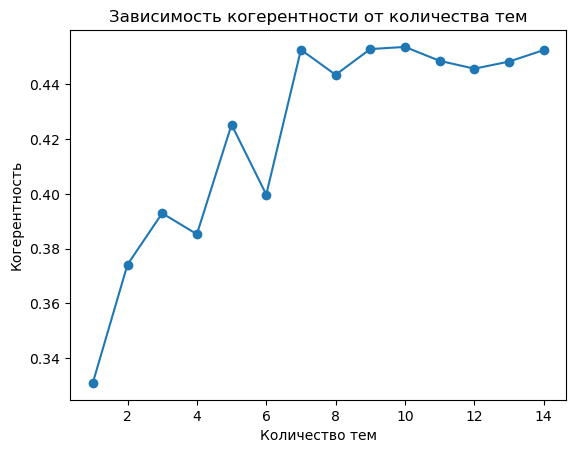

In [41]:
coherence_values = []
for num_topics in range(1, 15, 1): 
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                             num_topics=num_topics,
                             id2word=gensim_dictionary,
                             passes=10,
                             random_state=6457)
    
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

import matplotlib.pyplot as plt

plt.plot(range(1, 15, 1), coherence_values, marker='o')
plt.xlabel("Количество тем")
plt.ylabel("Когерентность")
plt.title("Зависимость когерентности от количества тем")
plt.show()

In [42]:
lda = gensim.models.LdaMulticore(corpus, 
                                 num_topics=7, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [43]:
lda.print_topics()

[(0,
  '0.009*"2" + 0.009*"лицензия" + 0.008*"apache" + 0.008*"язык" + 0.007*"рейтинг" + 0.006*"приложение" + 0.006*"•" + 0.006*"данные" + 0.006*"ms" + 0.005*"java"'),
 (1,
  '0.008*"val" + 0.007*"1" + 0.006*"fun" + 0.006*"игра" + 0.005*"0" + 0.005*"2" + 0.005*"анимация" + 0.004*"класс" + 0.004*"4" + 0.004*"метод"'),
 (2,
  '0.008*"код" + 0.006*"приложение" + 0.005*"файл" + 0.005*"функция" + 0.005*"the" + 0.004*"данные" + 0.004*"пользователь" + 0.004*"команда" + 0.003*"1" + 0.003*"пример"'),
 (3,
  '0.007*"курс" + 0.006*"команда" + 0.005*"сайт" + 0.005*"–" + 0.003*"продукт" + 0.003*"разработка" + 0.003*"опыт" + 0.003*"разработчик" + 0.003*"клиент" + 0.003*"сотрудник"'),
 (4,
  '0.010*"–" + 0.003*"мозг" + 0.003*"денис" + 0.003*"рука" + 0.003*"сказать" + 0.003*"видеть" + 0.002*"робот" + 0.002*"пока" + 0.002*"жизнь" + 0.002*"макс"'),
 (5,
  '0.007*"–" + 0.005*"игра" + 0.003*"сервис" + 0.003*"рынок" + 0.002*"дизайн" + 0.002*"идея" + 0.002*"россия" + 0.002*"пользователь" + 0.002*"технология

In [44]:
coherence_model_lda = CoherenceModel(model=lda,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.4526054991543388


In [45]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [46]:
vis_20 = gensimvis.prepare(lda, corpus, gensim_dictionary)

In [47]:
pyLDAvis.enable_notebook()

In [48]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004447  0.077874       1        1  23.406057
4      0.128860 -0.052155       2        1  20.485511
6      0.091344  0.005842       3        1  15.425399
5      0.068162  0.020267       4        1  14.991470
2     -0.120961 -0.033707       5        1  14.882897
0     -0.083533  0.088827       6        1   7.442868
1     -0.079427 -0.106949       7        1   3.365798, topic_info=             Term         Freq        Total Category  logprob  loglift
446             2  2020.000000  2020.000000  Default  30.0000  30.0000
2683          код  2148.000000  2148.000000  Default  29.0000  29.0000
831    приложение  2481.000000  2481.000000  Default  28.0000  28.0000
56              1  1722.000000  1722.000000  Default  27.0000  27.0000
5947     лицензия   784.000000   784.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
101             3   118.760815  1200.356211   Topic7  -5.7495   1.0782
3568       объект    97.384095   739.612669   Topic7  -5.9479   1.3640
162   изображение    90.560949   559.862351   Topic7  -6.0206   1.5698
1617      функция    86.359005  1191.784148   Topic7  -6.0681   0.7668
1250          тип    85.132557  1094.875664   Topic7  -6.0824   0.8373

[597 rows x 6 columns], token_table=      Topic      Freq Term
term                      
5475      1  0.202595    0
5475      2  0.022021    0
5475      3  0.016516    0
5475      4  0.007707    0
5475      5  0.516397    0
...     ...       ...  ...
7779      1  0.003757    •
7779      3  0.001879    •
7779      4  0.003757    •
7779      5  0.001879    •
7779      6  0.988212    •

[2302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 7, 6, 3, 1, 2])

In [49]:
from sklearn.decomposition import TruncatedSVD

In [50]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(
#     max_features=10000,  
#     min_df=3,           
#     max_df=0.5,         
#     stop_words=russian_stopwords,
#     ngram_range=(1, 3),  
#     binary=True         
# )

# count_matrix = count_vectorizer.fit_transform(df['tokenize_text'])

In [51]:
lsa_model = TruncatedSVD(n_components=7, random_state=0)
lsa_model.fit(tfidf_matrix)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: курс, код, сервис, язык, продукт, идея, инструмент, программа, друг, обучение
Topic 1: skillbox, skillbox рекомендовать, код, pro, практический, практический курс, курс, онлайнкурс, хабра, рекомендовать
Topic 2: студия, лебедев, артемий, артемий лебедев, студия артемий, дизайн, сервис, дизайнер, россия, рынок
Topic 3: лебедев, студия, артемий, артемий лебедев, студия артемий, файл, страница, логотип, кнопка, клавиатура
Topic 4: такси, uber, сервис, gett, водитель, услуга, заказ, агрегатор, россия, поездка
Topic 5: доклад, конференция, in, to, and, спикер, the, тестирование, of, интерфейс
Topic 6: такси, gett, uber, код, заказ, москва, if, доклад, return, водитель


In [52]:
from sklearn.decomposition import NMF

In [53]:
nmf_model = NMF(n_components=7, random_state=0)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: конференция, обучение, продукт, доклад, специалист, мероприятие, спикер, участник, руководитель, эксперт
Topic 1: файл, код, return, if, in, the, for, to, функция, строка
Topic 2: лебедев, студия, артемий, артемий лебедев, студия артемий, дизайн, дизайнер, страница, логотип, блог
Topic 3: думать, вообще, никто, друг, далёкий, какойтый, ктоть, смотреть, казаться, прийти
Topic 4: такси, сервис, uber, gett, водитель, услуга, россия, заказ, рынок, агрегатор
Topic 5: skillbox, курс, skillbox рекомендовать, практический, онлайнкурс, pro, практический курс, хабра, вебразработчик, весь читатель
Topic 6: устройство, модель, изображение, размер, корпус, использоваться, технология, режим, скорость, однако


In [54]:
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
lda_model = LatentDirichletAllocation(n_components=7, random_state=0)
lda_model.fit(tfidf_matrix)

for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: студия артемий, артемий лебедев, артемий, лебедев, студия, ios, отметить, вебсайт, протокол, менеджер
Topic 1: let, private, val, class, var, def, end, артемий, лебедев, артемий лебедев
Topic 2: счастие, ради, облачный, хранение, перевод, история, сервис, инструмент, let, private
Topic 3: сервис, студия, лебедев, язык, курс, продукт, код, программа, инструмент, рынок
Topic 4: сон, группа, let, private, val, class, var, def, end, артемий
Topic 5: skillbox рекомендовать, практический курс, skillbox, pro, return, if, онлайнкурс, весь читатель, промокод хабра, скидка 10
Topic 6: история, фон, вебсайт, системный, перевод, тестирование, быстрый, let, private, val


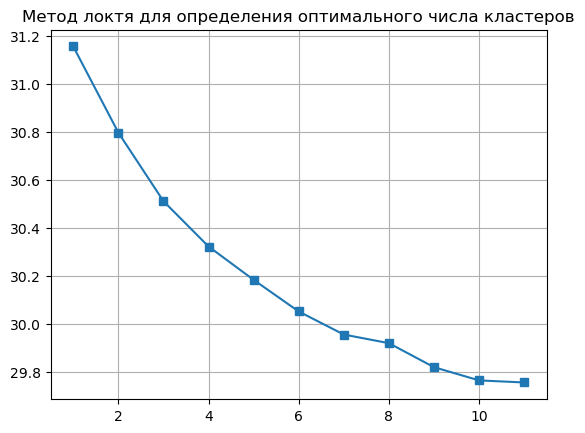

In [56]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(tfidf_matrix)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 12), inertia, marker="s")
plt.title("Метод локтя для определения оптимального числа кластеров")
plt.grid(True)
plt.show()

In [57]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init=50,
    random_state=42
)

In [58]:
km.fit(tfidf_matrix)

KMeans(n_clusters=6, n_init=50, random_state=42)

In [59]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [60]:
len(km.labels_)

1107

In [61]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [62]:
df['cluster'].value_counts()

cluster
5    441
1    248
4    153
2    116
3    104
0     45
Name: count, dtype: int64

In [75]:
matrix_0 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 0])
matrix_1 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 1])
matrix_2 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 2])
matrix_3 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 3])
matrix_4 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 4])
matrix_5 = tfidf_vectorizer.fit_transform(df['tokenize_text'][df['cluster'] == 5])

In [76]:
lsa_model = TruncatedSVD(n_components=6)
lsa_model.fit(matrix_0)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: заработать, доллар, значимый, защита, весь лишь, закрывать, задавать, al, занять, боль
Topic 1: заработать, защита, 25, задавать вопрос, звать, глубина, глобальный, 2001, 2017, достаточный
Topic 2: закон, 500, высота, боль, 40, возникать, дисплей, востребовать, закончить, базовый
Topic 3: агент, беседа, заняться, абсолютно, выяснить, заметка, двое, влияние, версия, буквально
Topic 4: 25, верхний, батарея, 18, apple, 200, воздух, журнал, воспользоваться, завтра
Topic 5: воздух, 50, вычислительный, весьма, взаимодействие, взяться, взрослый, весь лишь, звезда, журнал


Финансовые аспекты

In [77]:
lsa_model = TruncatedSVD(n_components=6, random_state=0)
lsa_model.fit(matrix_1)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: кстати, род, сложность, ресурс, пять, лист, идеально, создаваться, прогресс, сергей
Topic 1: сертификат, развиваться, поработать, сложность, наверняка, сигнал, создаваться, нейрон, комплект, курьер
Topic 2: база данные, объект, верить, маска, частица, безопасность, бонус, большой количество, верно, сигнал
Topic 3: большой количество, внести, тренажёр, бонус, заметка, волна, дорогой, вопервое, безопасность, лист
Topic 4: сертификат, развиваться, курьер, василий, пластика, серьёзно, совершить, коммуникация, комната, создаваться
Topic 5: комуть, сертификат, развиваться, кровь, курьер, трудно, отверстие, пациент, закрыть, василий


Образование и профессиональное развитие

In [78]:
lsa_model = TruncatedSVD(n_components=6, random_state=0)
lsa_model.fit(matrix_2)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: похожий, подача, холодный, весь остальной, логотип, очевидный, блок, требоваться, влияние, сотрудничество
Topic 1: государственный, серый, набор, нажать, положить, зелёный, вера, удалёнка, давно, and
Topic 2: государственный, банк, видимо, набор, влияние, of, больной, нажать, вниз, бесплатно
Topic 3: похожий, холодный, сообщение, сложиться, сомнение, несколько год, антон, здание, аппарат, клавиша
Topic 4: здание, минимальный, здоровый, совет, похожий, красивый, эффективный, традиционный, канал, собеседование
Topic 5: антон, сложиться, холодный, логика, клавиша, коготь, скрипт, 2020, брат, класс


Государственные и финансовые структуры

In [79]:
lsa_model = TruncatedSVD(n_components=6, random_state=0)
lsa_model.fit(matrix_3)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: достать, документ, выдавать, воспринимать, визитка, запись, гореть, безопасный, жизненный, запрос
Topic 1: европа, железо, визитка, 2019 год, java, 1000, давление, 200, дэн, влиять
Topic 2: браузер, бренд, естественный, изменить, диск, естественно, занять, доверять, забыть, вовсе
Topic 3: youtube, визитка, занять, желать, запах, весьма, биологический, вверх, бытовой, заняться
Topic 4: весьма, документ, внезапно, запрос, вечер, внешний, выбор, верхний, иван, европа
Topic 5: женщина, ведущий, внезапно, житель, apple, достать, 90, безопасный, 70, белый


Технологии и инновации

In [80]:
lsa_model = TruncatedSVD(n_components=6, random_state=0)
lsa_model.fit(matrix_4)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: долг, движок, домашний, виртуальный, удовольствие, опытный, космический, государство, василий, несколько год
Topic 1: конференция, бежать, благодаря, заметка, элемент, призрак, конфликт, долг, герой, дэн
Topic 2: движок, право, готовиться, норма, девайс, космический, угодный, бояться, дорого, делаться
Topic 3: домашний, долг, виртуальный, движок, выполнение, of, долго, внешний, василий, документация
Topic 4: внутренний, бежать, график, аудитория, дверь, великий, python, боевой, вовсе, огонь
Topic 5: плюс, одежда, одинаковый, государство, ощущение, падать, сравнивать, минимум, навык, нагрузка


Социальные и глобальные темы

In [81]:
lsa_model = TruncatedSVD(n_components=6, random_state=0)
lsa_model.fit(matrix_5)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: приложение, клиент, сервис, книга, игра, навык, код, россия, страна, ребёнок
Topic 1: навык, вакансия, собеседование, тестировщик, профессия, руководитель, it, тестирование, преподаватель, работодатель
Topic 2: удалёнка, офис, город, россия, страна, приехать, москва, зарплата, удалённый, ехать
Topic 3: приложение, сервис, клиент, цена, кнопка, аккумулятор, устройство, корпус, дизайн, мобильный
Topic 4: страна, коронавирус, пациент, инфекция, врач, медицинский, заболевание, пандемия, удалённый, население
Topic 5: преподаватель, тестировщик, тестирование, занятие, студент, задание, учебный, аккумулятор, qa, лекция


Образование и работа в IT

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tokenize_text'], df['cluster'], 
                                                      test_size=0.3, 
                                                      random_state=0)

In [70]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [84]:
X_train_ = tfidf_vectorizer.fit_transform(X_train)
X_test_ = tfidf_vectorizer.transform(X_test)

In [86]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_, y_train)
y_pred = model_rf.predict(X_test_)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.86      0.75      0.80        75
           2       1.00      0.97      0.99        34
           3       0.94      0.94      0.94        34
           4       1.00      0.48      0.65        44
           5       0.80      1.00      0.89       138

    accuracy                           0.86       333
   macro avg       0.93      0.84      0.87       333
weighted avg       0.88      0.86      0.85       333



In [89]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_, y_train)
y_pred = model_knn.predict(X_test_)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.52      0.72      0.61        75
           2       1.00      0.79      0.89        34
           3       1.00      0.68      0.81        34
           4       0.93      0.59      0.72        44
           5       0.85      0.89      0.87       138

    accuracy                           0.78       333
   macro avg       0.88      0.78      0.82       333
weighted avg       0.82      0.78      0.79       333



In [91]:
model_lr = LogisticRegression()
model_lr.fit(X_train_, y_train)
y_pred = model_lr.predict(X_test_)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.95      0.80      0.87        75
           2       1.00      1.00      1.00        34
           3       0.97      0.88      0.92        34
           4       0.97      0.86      0.92        44
           5       0.86      1.00      0.93       138

    accuracy                           0.92       333
   macro avg       0.96      0.88      0.92       333
weighted avg       0.93      0.92      0.92       333



In [93]:
import pickle

with open('model_lr_st.pkl', 'wb') as f:
    pickle.dump(model_lr, f)

In [94]:
with open('vectorizer_st.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [96]:
df.to_csv('states2.csv')

### Кластеры

**1** - Финансовые аспекты

**2** - Образование и профессиональное развитие

**3** - Государственные и финансовые структуры

**4** - Технологии и инновации

**5** - Социальные и глобальные темы

**6** - Образование и работа в IT